## Tic tac toe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading data
data = pd.read_csv("E:/lab1_data/tic_tac_toe.txt", sep = ",")
gnb = GaussianNB()

In [3]:
# Setting cols.
data.columns = ["first_row_left", "first_row_middle", "first_row_right", "center_row_left", "center_row_middle", "center_row_right", "bottom_row_left", "bottom_row_middle", "bottom_row_right", "is_win"]

# As we can see the the different move options, we perform label encoding.
mapping_for_moves = {'x':1, "o":0} # For b, we put mean of the data.
mapping_for_wins = {"positive":1, "negative":0} # Positive is win, negative is lose
data.is_win = data.is_win.map(mapping_for_wins)


In [4]:
from sklearn.preprocessing import LabelEncoder
encoded_data = data.apply(LabelEncoder().fit_transform)

In [6]:
from sklearn.metrics import accuracy_score

test_size = [i / 10 for i in range(1, 10)]
accuracy = []
accuracy_train = []
for i in test_size:
    features_train, features_test, labels_train, labels_test = train_test_split(
        encoded_data.drop(['is_win'], axis=1), 
        encoded_data['is_win'], 
        test_size=i)
    gnb.fit(features_train, labels_train)
    #test
    gnb_pred = gnb.predict(features_test)
    accuracy.append(accuracy_score(labels_test, gnb_pred))
    #train
    predicted = gnb.predict(features_train)
    accuracy_train.append(accuracy_score(labels_train, predicted))

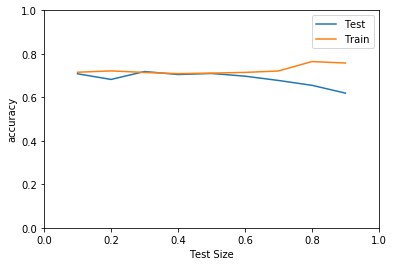

In [8]:
axes = plt.gca()
axes.set_ylabel('accuracy')
axes.set_xlabel('Test Size')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy, label='Test')
plt.plot(test_size, accuracy_train, label='Train')
plt.legend()
